In [27]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

In [28]:
# constants
NUM_ACTIONS = 3
NUM_GAMES = 20
NUM_TRIALS_PER_GAME = 500
NUM_SAMPLES_PLOTTING = 1000 # for plotting purposes

In [29]:
# sample a list of means q*(a) for each action
def sample_means():
    mu, sigma = 0, 1
    return np.random.normal(mu, sigma, NUM_ACTIONS)

# def sample_distributions(sample_means):
#     return list(map(lambda mu: np.random.normal(mu, 1, NUM_SAMPLES_PLOTTING), sample_means))
    
    
means = sample_means()
# sample_distributions = sample_distributions(sample_means)

print("Sample means: ", means)
# print("First sample distribution: ", sample_distributions[0])

Sample means:  [ 0.44552673 -0.49971298  0.53662213]


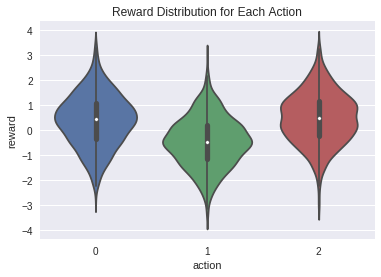

In [30]:
# illustrate each action's distribution
# ax = sns.distplot(sample_means).set_title("moo")

rows = []
for action in range(NUM_ACTIONS):
    for sample in range(NUM_SAMPLES_PLOTTING):
        row = [action, np.random.normal(means[action], 1)]
        rows.append(row)

df = pd.DataFrame(data=rows, columns=['action', 'reward'])


ax = sns.violinplot(x="action", y="reward", data=df).set_title("Reward Distribution for Each Action")

In [31]:
# create separate games (sample means)
games = []
for i in range(NUM_GAMES):
    games.append(sample_means())
    
games[0]

array([-0.27365676, -1.15604795, -0.86383996])

In [33]:
# now define an RL agent that is greedy (1-e) of the time
class Agent:
    def __init__(self, e=0, step_size=0):
        self.e = e
        self.step_size = step_size
        self.time_step = 1
        self.action_mean_estimates = np.zeros(NUM_ACTIONS)

    def choose_action(self, sample_means):
        
        # take action with greatest reward
        action_index = np.argmax(self.action_mean_estimates)
        max_reward = np.max(self.action_mean_estimates)
        
        # if the max reward is zero, try a random one from the zeros
        if max_reward == 0:
            nonzeros = (self.action_mean_estimates == 0).nonzero()[0]
            if len(nonzeros) > 0:
                action_index = np.random.choice(nonzeros)
        
        # with prob e choose a random one instead
        if self.e != 0 and np.random.uniform() < self.e:
            action_index = np.random.randint(0, high=NUM_ACTIONS)
            
        # sample reward from chosen action
        action_reward = np.random.normal(sample_means[action_index])        
        
        if self.step_size == 0:
            step_size = 1 / self.time_step
        else:
            step_size = self.step_size
        
        # update that action's reward estimate and sum from incremental update
        temp = self.action_mean_estimates[action_index]
        self.action_mean_estimates[action_index] = temp + step_size * (action_reward - temp)
        
    
        # update time step
        self.time_step = self.time_step + 1
        
        # return the reward obtained
        return action_reward
    

In [34]:
# try all games for increasing trials, to plot performance
results = { "greedy": [], "greedy_1": [], "greedy_2": [] } # one per num of trials
for time_step in range(NUM_TRIALS_PER_GAME):
    if time_step % 10 == 0:
        print("Trying up to {} time steps...".format(time_step))
    
    
    rewards = []
    rewards_1 = []
    rewards_2 = []
    
    
    for game in range(NUM_GAMES):
        # new agent per game
        greedy = Agent()
        greedy_1 = Agent(e=0.2)
        greedy_2 = Agent(e=0.01)
        

        
        # play the game up to that many time steps
        for t in range(time_step):
            rewards.append(greedy.choose_action(games[game]))
            rewards_1.append(greedy_1.choose_action(games[game]))
            rewards_2.append(greedy_2.choose_action(games[game]))
        
        
    results["greedy"].append(np.mean(rewards))
    results["greedy_1"].append(np.mean(rewards_1))
    results["greedy_2"].append(np.mean(rewards_2))

Trying up to 0 time steps...
Trying up to 10 time steps...
Trying up to 20 time steps...


/home/misrab/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/misrab/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Trying up to 30 time steps...
Trying up to 40 time steps...
Trying up to 50 time steps...
Trying up to 60 time steps...
Trying up to 70 time steps...
Trying up to 80 time steps...
Trying up to 90 time steps...
Trying up to 100 time steps...
Trying up to 110 time steps...
Trying up to 120 time steps...
Trying up to 130 time steps...
Trying up to 140 time steps...
Trying up to 150 time steps...
Trying up to 160 time steps...
Trying up to 170 time steps...
Trying up to 180 time steps...
Trying up to 190 time steps...
Trying up to 200 time steps...
Trying up to 210 time steps...
Trying up to 220 time steps...
Trying up to 230 time steps...
Trying up to 240 time steps...
Trying up to 250 time steps...
Trying up to 260 time steps...
Trying up to 270 time steps...
Trying up to 280 time steps...
Trying up to 290 time steps...
Trying up to 300 time steps...
Trying up to 310 time steps...
Trying up to 320 time steps...
Trying up to 330 time steps...
Trying up to 340 time steps...
Trying up to 35

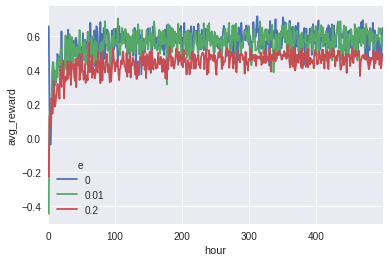

In [49]:
# ax = sns.tsplot(data=results["greedy"])

df1 = pd.DataFrame({
"hour":range(NUM_TRIALS_PER_GAME),
"e": "0",
"avg_reward": results["greedy"]})

df2 = pd.DataFrame({
"hour":range(NUM_TRIALS_PER_GAME),
"e": "0.01",
"avg_reward": results["greedy_2"]})


df3 = pd.DataFrame({
"hour":range(NUM_TRIALS_PER_GAME),
"e": "0.2",
"avg_reward": results["greedy_1"]})

df = pd.concat([df1,df2, df3],axis=0)
df['unit'] = 'subject'

plt.figure()
sns.tsplot(data=df, time='hour', condition='e',
unit='unit', value='avg_reward')

# ax = sns.tsplot(data=df).set_title("Average Rewards for Agent")
# plt.xlabel("time steps")
# plt.ylabel("average reward")
